In [1]:
import pandas as pd
import numpy as np
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.cluster import KMeans
from mlxtend.frequent_patterns import apriori, association_rules
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
# Cargar datos
data1 = pd.read_excel('data/muestra1_modif.xlsx')

In [3]:
data1.head()

,CÓDIGO ARTÍCULO,CLI,2015,2016,2017,2018,2019,2020,2021,2022,2023,2024
0,ARTICULO0,222.0,6.0,8.0,3.0,1.0,5.0,3.0,11.0,1.0,3.0,3.0
1,NaN,4077.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2.0,NaN
2,ARTICULO2,222.0,1.0,NaN,NaN,NaN,1.0,NaN,NaN,NaN,NaN,NaN
3,ARTICULO3,7884.0,NaN,NaN,NaN,NaN,8.0,NaN,NaN,NaN,NaN,NaN
4,ARTICULO4,838.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,3.0


In [4]:
data1.columns

Index(['CÓDIGO ARTÍCULO',             'CLI',              2015,
                    2016,              2017,              2018,
                    2019,              2020,              2021,
                    2022,              2023,              2024],
      dtype='object')

                CLI          2015          2016          2017          2018  \
count  38277.000000  38277.000000  38277.000000  38277.000000  38277.000000   
mean    5089.111529      3.107558      3.181702      3.700238      3.245004   
std     5482.458704    304.685629    312.101636    364.127834    317.970765   
min        0.000000    -23.000000    -40.000000    -19.000000    -40.000000   
25%     2135.000000      0.000000      0.000000      0.000000      0.000000   
50%     4563.000000      0.000000      0.000000      0.000000      0.000000   
75%     7612.000000      0.000000      0.000000      0.000000      0.000000   
max    95423.000000  59489.000000  60906.000000  70836.000000  62118.000000   

               2019          2020          2021          2022          2023  \
count  38277.000000  38277.000000  38277.000000  38277.000000  38277.000000   
mean       3.177679      2.704575      3.236199      4.128667      3.345455   
std      311.334494    264.944707    317.071129    

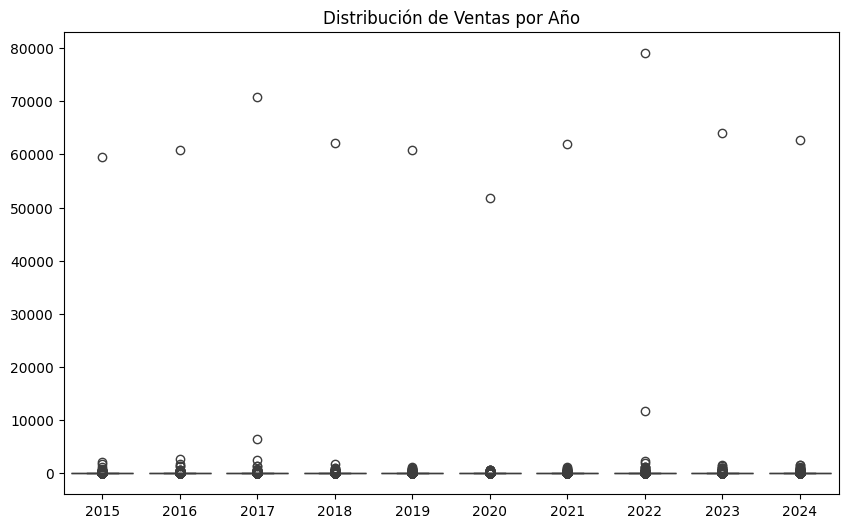

      CÓDIGO ARTÍCULO  VentasTotales
38276   ARTICULO38276         633792
22181               0          25870
22916               0          11013
11550   ARTICULO11550           7875
19766               0           6919


/var/folders/3_/bsh490990pv6w7gjtmjv6qy80000gn/T/ipykernel_2449/1665210335.py:31: FutureWarning: DataFrame.applymap has been deprecated. Use DataFrame.map instead.
  basket = data1[años_columnas].applymap(lambda x: 1 if x > 0 else 0)
/Users/egoitzaulestiapadilla/opt/anaconda3/lib/python3.9/site-packages/mlxtend/frequent_patterns/fpcommon.py:161: DeprecationWarning: DataFrames with non-bool types result in worse computationalperformance and their support might be discontinued in the future.Please use a DataFrame with bool type
  warnings.warn(


TypeError: association_rules() missing 1 required positional argument: 'num_itemsets'

In [6]:
# --- 1. Limpieza y Preparación de los Datos ---
# Rellenar NaN con ceros en columnas numéricas
data1.fillna(0, inplace=True)

# Asegurar que las columnas de años sean cadenas y luego enteros
años_columnas = [col for col in data1.columns if isinstance(col, int) or (isinstance(col, str) and col.isdigit())]
data1[años_columnas] = data1[años_columnas].astype(int)

# Crear nuevas características (ventas promedio por cliente)
data1['VentaPromedioCliente'] = data1[años_columnas].mean(axis=1)

# --- 2. Exploración de los Datos ---
# Resumen descriptivo
print(data1.describe())

# Visualización de datos
plt.figure(figsize=(10, 6))
sns.boxplot(data=data1[años_columnas])
plt.title("Distribución de Ventas por Año")
plt.show()

# Identificar los productos más vendidos
ventas_totales = data1[años_columnas].sum(axis=1)
data1['VentasTotales'] = ventas_totales
productos_mas_vendidos = data1.sort_values(by='VentasTotales', ascending=False)
print(productos_mas_vendidos[['CÓDIGO ARTÍCULO', 'VentasTotales']].head())

# --- 3. Análisis Avanzado ---
# Reglas de Asociación
# Convertir a formato binario
basket = data1[años_columnas].applymap(lambda x: 1 if x > 0 else 0)
frequent_itemsets = apriori(basket, min_support=0.05, use_colnames=True)

# Generar reglas de asociación
if len(frequent_itemsets) > 0:
    rules = association_rules(frequent_itemsets, metric="confidence", min_threshold=0.5)
    print("\nReglas de asociación encontradas:")
    print(rules.head())
else:
    print("No se encontraron conjuntos de elementos frecuentes con el soporte mínimo dado.")



# Clustering de clientes
clientes_data = data1[['CLI', 'VentaPromedioCliente']]
scaler = StandardScaler()
clientes_scaled = scaler.fit_transform(clientes_data)

kmeans = KMeans(n_clusters=3, random_state=42)
clientes_data['Cluster'] = kmeans.fit_predict(clientes_scaled)

# Visualización de clusters
plt.figure(figsize=(10, 6))
sns.scatterplot(x='CLI', y='VentaPromedioCliente', hue='Cluster', data=clientes_data, palette='viridis')
plt.title("Clusters de Clientes")
plt.show()

# --- 4. Modelos Predictivos (Ejemplo de Regresión) ---
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error

X = data1[años_columnas]
y = data1['VentaPromedioCliente']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

model = LinearRegression()
model.fit(X_train, y_train)

y_pred = model.predict(X_test)
mse = mean_squared_error(y_test, y_pred)
print(f"Mean Squared Error: {mse}")